## 필요한 라이브러리를 설치합니다.

In [ ]:
! pip install numpy pandas scikit-learn matplotlib

## 라이브러리들을 불러 옵니다.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

## 저장된 데이터를 로드합니다. (csv 파일로 부터)

In [ ]:
import pandas as pd

# Load CSV into a DataFrame
df = pd.read_csv("output_1.csv", skiprows=3)

# Display the first few rows
print(df.head())
print(df["_value"])


In [ ]:
df["_value"]

* 데이터를 시각화해 봅니다.

In [ ]:
# Optional: Visualize the anomaly scores
plt.figure(figsize=(10, 4))
plt.plot(df["_value"], marker='o', linestyle='', label='data')
plt.xlabel("Data Point Index")
plt.ylabel("data")
plt.title("data view")
plt.legend()
plt.show()


## Anomaly score를 계산합니다. (인공지능 적용)

* isolation forest 기법을 적용

In [64]:
# Ensure "_value" is numeric
df["_value"] = pd.to_numeric(df["_value"], errors="coerce")

# Extract feature for anomaly detection
X = df[["_value"]]

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)  # Fit the model first

# Compute anomaly scores
df["anomaly_score"] = iso_forest.decision_function(X)  # Get scores
df["is_anomaly"] = iso_forest.predict(X)  # -1 (anomaly), 1 (normal)

* 데이터가 잘 만들어졌는지 확인해봅시다.

In [27]:
# Display results
print(df[["_value", "anomaly_score", "is_anomaly"]])

      _value  anomaly_score  is_anomaly
0     0.0124       0.166212           1
1     0.0135       0.116314           1
2     0.0122       0.148271           1
3     0.0130       0.150576           1
4     0.0116       0.144818           1
...      ...            ...         ...
3563  0.0136       0.116405           1
3564  0.0131       0.148214           1
3565  0.0142       0.069524           1
3566  0.0114       0.125594           1
3567  0.0120       0.141364           1

[3568 rows x 3 columns]


* 그래프로 그려봅시다.

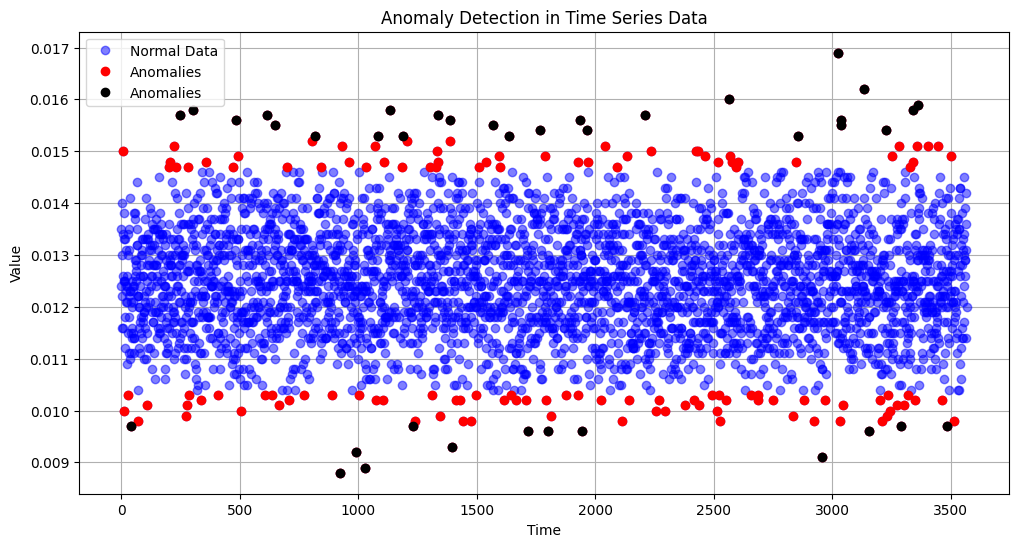

In [66]:
# Split normal and anomaly points
normal_data = df[df["is_anomaly"] == 1]
anomaly_data = df[df["is_anomaly"] == -1]
serious = df[df['anomaly_score'] < -0.1]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df["_value"], marker='o', linestyle='', label="Normal Data", color="blue", alpha=0.5)
plt.plot(anomaly_data["_value"], marker='o', linestyle='', color="red", label="Anomalies")
plt.plot(serious["_value"], marker='o', linestyle='', color="black", label="Anomalies")

# Formatting
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Anomaly Detection in Time Series Data")
plt.legend()
plt.grid()

# Show plot
plt.show()